## 2. Linear Regression with one variable
### 2.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex1/ex1/ex1data1.txt'

with open(data_path) as f:
    data = f.read().splitlines()
    data = np.array([tuple(i.split(',')) for i in data]).astype(float)


In [3]:
X = data[:, 0]
y = data[:, 1]
m = len(y); print(m)

97


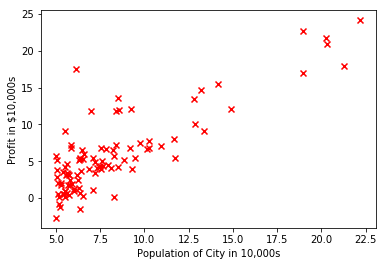

In [4]:
plt.scatter(X, y, marker = 'x', color='r')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');

### 2.2 Gradient Descent

In [5]:
X = np.array(tuple(zip(np.ones(m), X)))

In [6]:
# initialise the theta parameters to zero
theta = np.zeros(2)
iterations = 1500;
alpha = 0.01;

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    y_hat = np.dot(X, theta.transpose())
    J = sum((y_hat-y)**2)/(2*m)
    
    return J

In [8]:
J = computeCost(X, y, theta)
print(J)

32.072733877455654


In [9]:
# further testing of the cost function
J = computeCost(X, y, np.array([-1 , 2])); # Expected cost value (approx) 54.24
print(J)

54.24245508201238


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Updates theta parameter values using gradient descent method
    
    RETURNS theta ([n,1] array), J_hist ([num_iters, 1] array)
    """
    
    # initialise some useful values
    m = len(X)
    J_hist = np.zeros(num_iters) # to store cost function output over each iteration
    
    for i in range(num_iters):
        y_hat = np.dot(X, theta.transpose()) # estimated y value
        
        J_deriv = np.dot((y_hat-y), X)
        #return J_deriv
        
        # Update theta
        theta = theta - (alpha/m) * J_deriv
                      
        J_hist[i] = computeCost(X, y, theta)
        
    return theta, J_hist

In [11]:
theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)

Text(0,0.5,'Cost (MSE)')

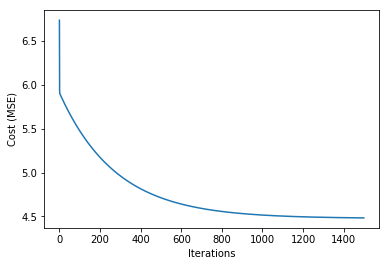

In [12]:
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')

In [13]:
# expected values [-3.6303, 1.1664]
theta

array([-3.63029144,  1.16636235])

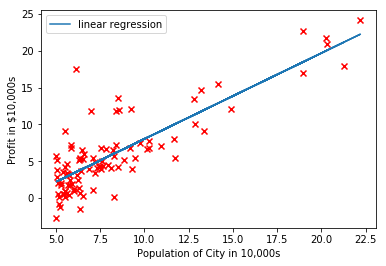

In [14]:
plt.scatter(X[:, 1], y, marker = 'x', color='r')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');

plt.plot(X[:, 1], np.dot(X, theta), label='linear regression')
plt.legend()

In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta);
print('For population = 35,000, we predict a profit of %.1f\n'%(predict1*10000));
predict2 = np.dot(np.array([1, 7]), theta);
print('For population = 70,000, we predict a profit of %.1f\n'%(predict2*10000));

For population = 35,000, we predict a profit of 4519.8

For population = 70,000, we predict a profit of 45342.5



### 2.4 Visualising J(theta)

In [16]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [17]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)));

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]);
        J_vals[i,j] = computeCost(X, y, t);

In [18]:
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.transpose();

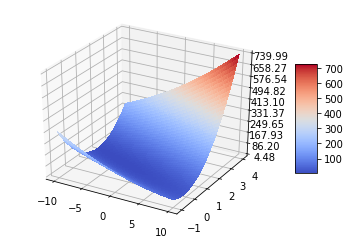

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface.
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

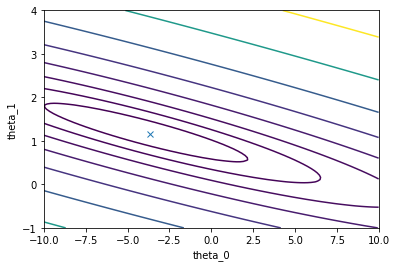

In [20]:
# Contour plot
plt.figure;
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0'); 
plt.ylabel('theta_1');

plt.plot(theta[0], theta[1], 'x');

# Optional Exercises
## 3. Linear Regression with multiple variables

In [22]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex1/ex1/ex1data2.txt'

with open(data_path) as f:
    data = f.read().splitlines()
    data = np.array([tuple(i.split(',')) for i in data]).astype(float)


In [23]:
X = data[:, [0,1]]
y = data[:, 2]
m = len(y); print(m)

47


### Feature Normalization
This is needed for n > 1

In [24]:
def featureNormalise(X):
    """
    Normalises the input array by subtracting the mean and dividing by standard deviation
    Returns X_norm, mu, sigma
    """
    
    mu = np.mean(X)
    sigma = np.std(X)
    
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma
    

In [25]:
X_norm, mu, sigma = np.apply_along_axis(featureNormalise, 0, X)
X_norm = np.array(tuple(zip(X_norm[0], X_norm[1])))

In [26]:
print(X_norm[1])
print(mu)
print(sigma)

[-0.5096407  -0.22609337]
[2000.6808510638298 3.1702127659574466]
[786.2026187430467 0.7528428090618781]


### Gradient Descent

In [27]:
# Add the array of ones to the beginning
X_norm = np.column_stack((np.ones(m), X_norm))
n = X_norm.shape[1]; print(n)

3


In [28]:
theta = np.zeros(n)
iterations = 1500
alpha = 0.01

In [29]:
theta

array([0., 0., 0.])

In [30]:
theta, J_hist = gradientDescent(X_norm, y, theta, alpha, iterations)

In [31]:
theta

array([340412.56301439, 109370.05670466,  -6500.61509507])

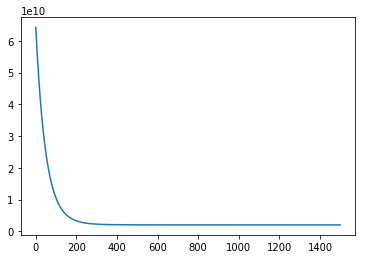

In [32]:
plt.plot(J_hist)

In [33]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [34]:
# Predicted price of 1650 sq-ft , 3 bedroom house:
x_1, x_2 = 1650, 3

x_1_norm = (x_1 - mu[0])/sigma[0]
x_2_norm = (x_2 - mu[1])/sigma[1]

print(x_1_norm, x_2_norm)

x_pred = np.array([1, x_1_norm, x_2_norm])

-0.4460438603276164 -0.2260933675776883


In [35]:
y_hat = np.dot(theta, x_pred)
print(y_hat)

293098.4666757651


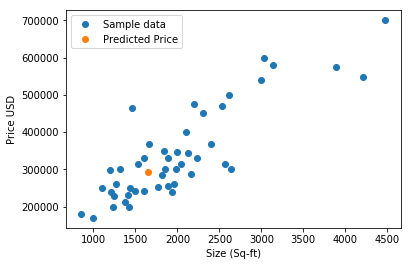

In [36]:
plt.plot(X[:, 0], y, 'o', label='Sample data')
plt.plot(x_1, y_hat, 'o', label='Predicted Price')
plt.ylabel('Price USD')
plt.xlabel('Size (Sq-ft)')
plt.legend()

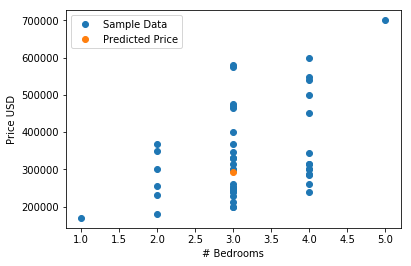

In [37]:
plt.plot(X[:, 1], y, 'o', label='Sample Data')
plt.plot(x_2, y_hat, 'o', label='Predicted Price')
plt.ylabel('Price USD')
plt.xlabel('# Bedrooms')
plt.legend()

## Extra Stuff (SKLearn)
Univariate:

In [72]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex1/ex1/ex1data1.txt'
data = np.loadtxt(data_path, delimiter=',')
X = data[:, 0]
y = data[:, 1]

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg = LinearRegression()

In [76]:
reg.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print(reg.coef_)
print(reg.intercept_)

[1.19303364]
-3.89578087831185


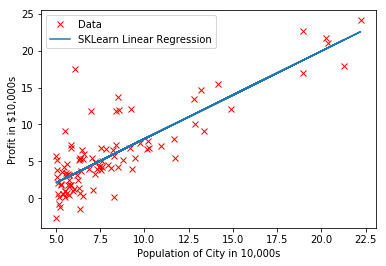

In [87]:
plt.plot(X, y, 'o', marker='x', label='Data', color='r')
plt.plot(X, X*reg.coef_+reg.intercept_, label='SKLearn Linear Regression')
plt.legend()
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');

Multivariate:

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex1/ex1/ex1data2.txt'
data = np.loadtxt(data_path, delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

In [126]:
scaler = StandardScaler()

In [127]:
# StandardScaler.fit(X) finds mean and standard deviation to feature scaling.
mu = scaler.fit(X).mean_
sigma = scaler.fit(X).var_
print('Means: {}'.format(mu))
print('Sigma: {}'.format(sigma))

Means: [2000.68085106    3.17021277]
Sigma: [6.18114558e+05 5.66772295e-01]


In [128]:
# .transform(X) applies the scaling/transformation
X = scaler.fit(X).transform(X)

In [129]:
# Instantiate Linear Regression model
reg = LinearRegression()

In [131]:
reg.fit(X, y) # Fit the model

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [132]:
np.append(reg.intercept_, reg.coef_)

array([340412.65957447, 109447.79646964,  -6578.35485416])

These are the same results as the manual LinearRegression model above.